# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **02.02.2024**

Мягкий дедлайн: **26.02.24 23:59** -> **28.02.24 23:59**

Жесткий дедлайн: **09.03.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.


$$ d_{w}Q(w) = d_{w}(\dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)) = \dfrac{1}{\ell} d_{w}( \left( y - Xw \right)^T \left( y - Xw \right)) = \dfrac{1}{\ell} d_{w}\left( y - Xw \right)^T \left( y - Xw \right) + \dfrac{1}{\ell} \left( y - Xw \right)^T d_{w}\left( y - Xw \right) = \dfrac{1}{\ell} d_{w}\left( -w^TX^T \right) \left( y - Xw \right) + \dfrac{1}{\ell} \left( y - Xw \right)^T d_{w}\left( y - Xw \right) = -\dfrac{1}{\ell} d_{w} w^T X^T \left( y - Xw \right) - \dfrac{1}{\ell} \left( y - Xw \right)^T X d_{w} w = -\dfrac{1}{\ell} \left( y - Xw \right)^T X d_{w} w - \dfrac{1}{\ell} \left( y - Xw \right)^T X d_{w} w = - \dfrac{2}{\ell} \left( y - Xw \right)^T X d_{w} w
$$

$$ \nabla Q(w) = (- \dfrac{2}{\ell} \left( y - Xw \right)^T X)^T = - \dfrac{2}{\ell} X^T ( y - Xw )$$


### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).


Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [321]:
from __future__ import annotations

from typing import List

from descents import BaseDescent

## Задание 3. Проверка кода (0 баллов)

In [322]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [323]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [324]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [325]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [326]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/108330711/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/108333123/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/108330826/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/108330861/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/108342464/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [327]:
import numpy as np
import pandas as pd

from descents import get_descent
from linear_regression import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from descents import LossFunction
from sklearn.preprocessing import StandardScaler
from time import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [328]:
data = pd.read_csv('autos.csv')

In [329]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


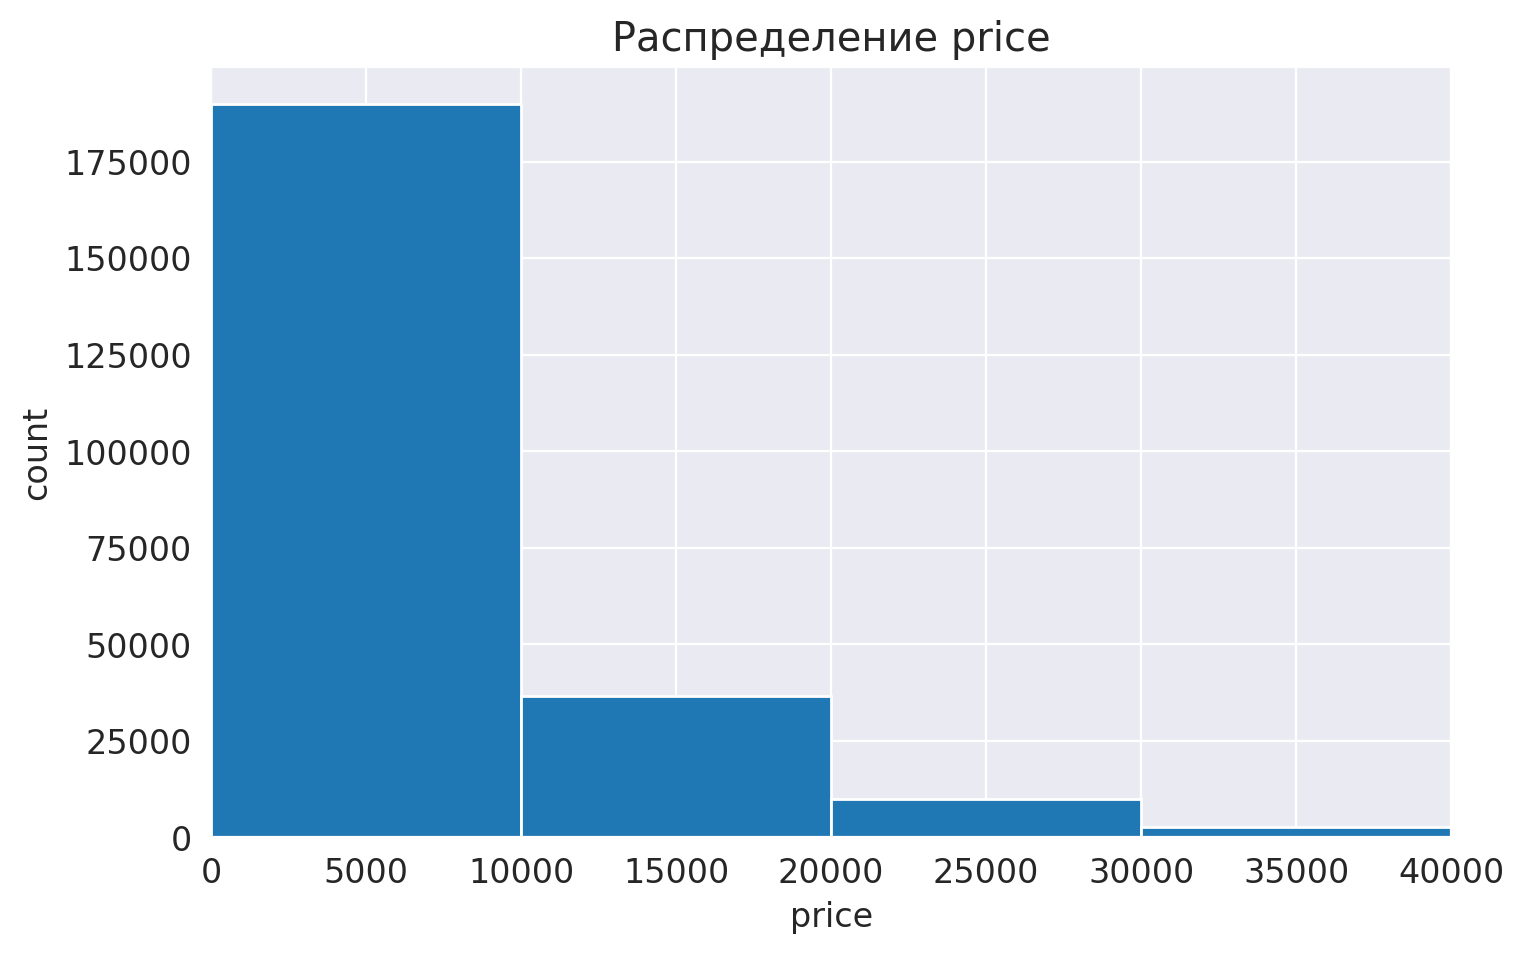

In [330]:
plt.hist(data['price'])

plt.xlim(0, 40_000)
plt.title("Распределение price")
plt.ylabel("count")
plt.xlabel("price")
plt.show()



> Распределение цены кажется не особо информативным, поэтому нарисуем график в логарифмической шкале и введем соответствующий признак



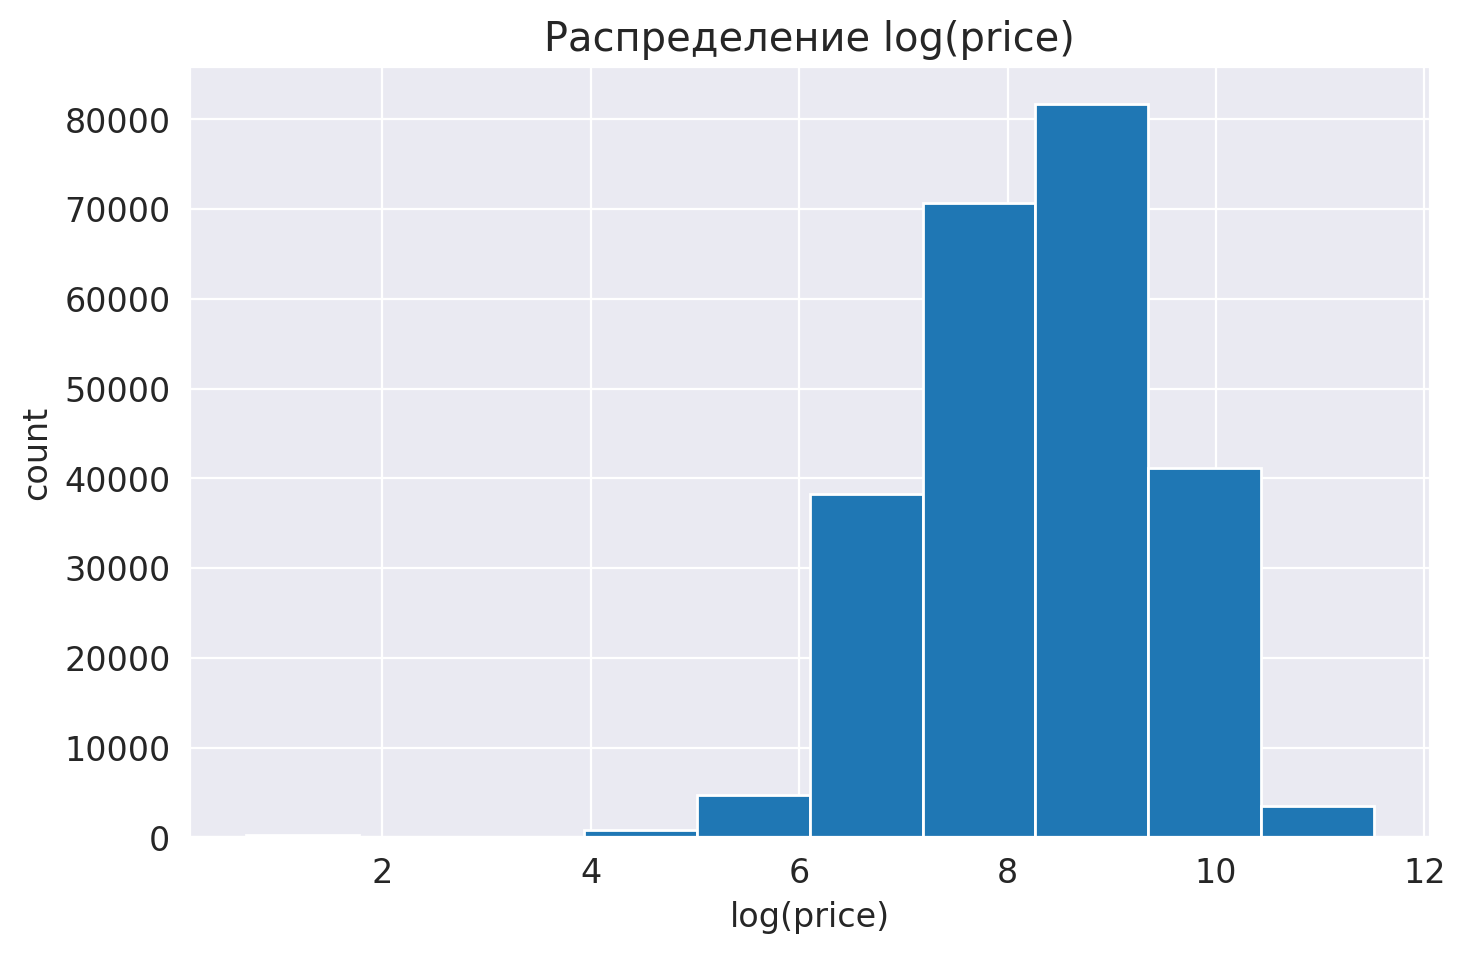

In [331]:
log_price = np.log1p(data['price'].values)

plt.title("Распределение log(price)")
plt.ylabel("count")
plt.xlabel("log(price)")
plt.hist(log_price)
plt.show()

In [332]:
data['log_price'] = log_price
data = data[(data['price'] >= np.percentile(data['price'], 5)) & \
    (data['price'] <= np.percentile(data['price'], 95))]

display(data['price'].agg(['min', 'max', 'mean']))
data.drop(columns=['price'], inplace=True)

min       599.000000
max     22000.000000
mean     5833.475118
Name: price, dtype: float64

<ipython-input-332-6d00f94390c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['price'], inplace=True)


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [333]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

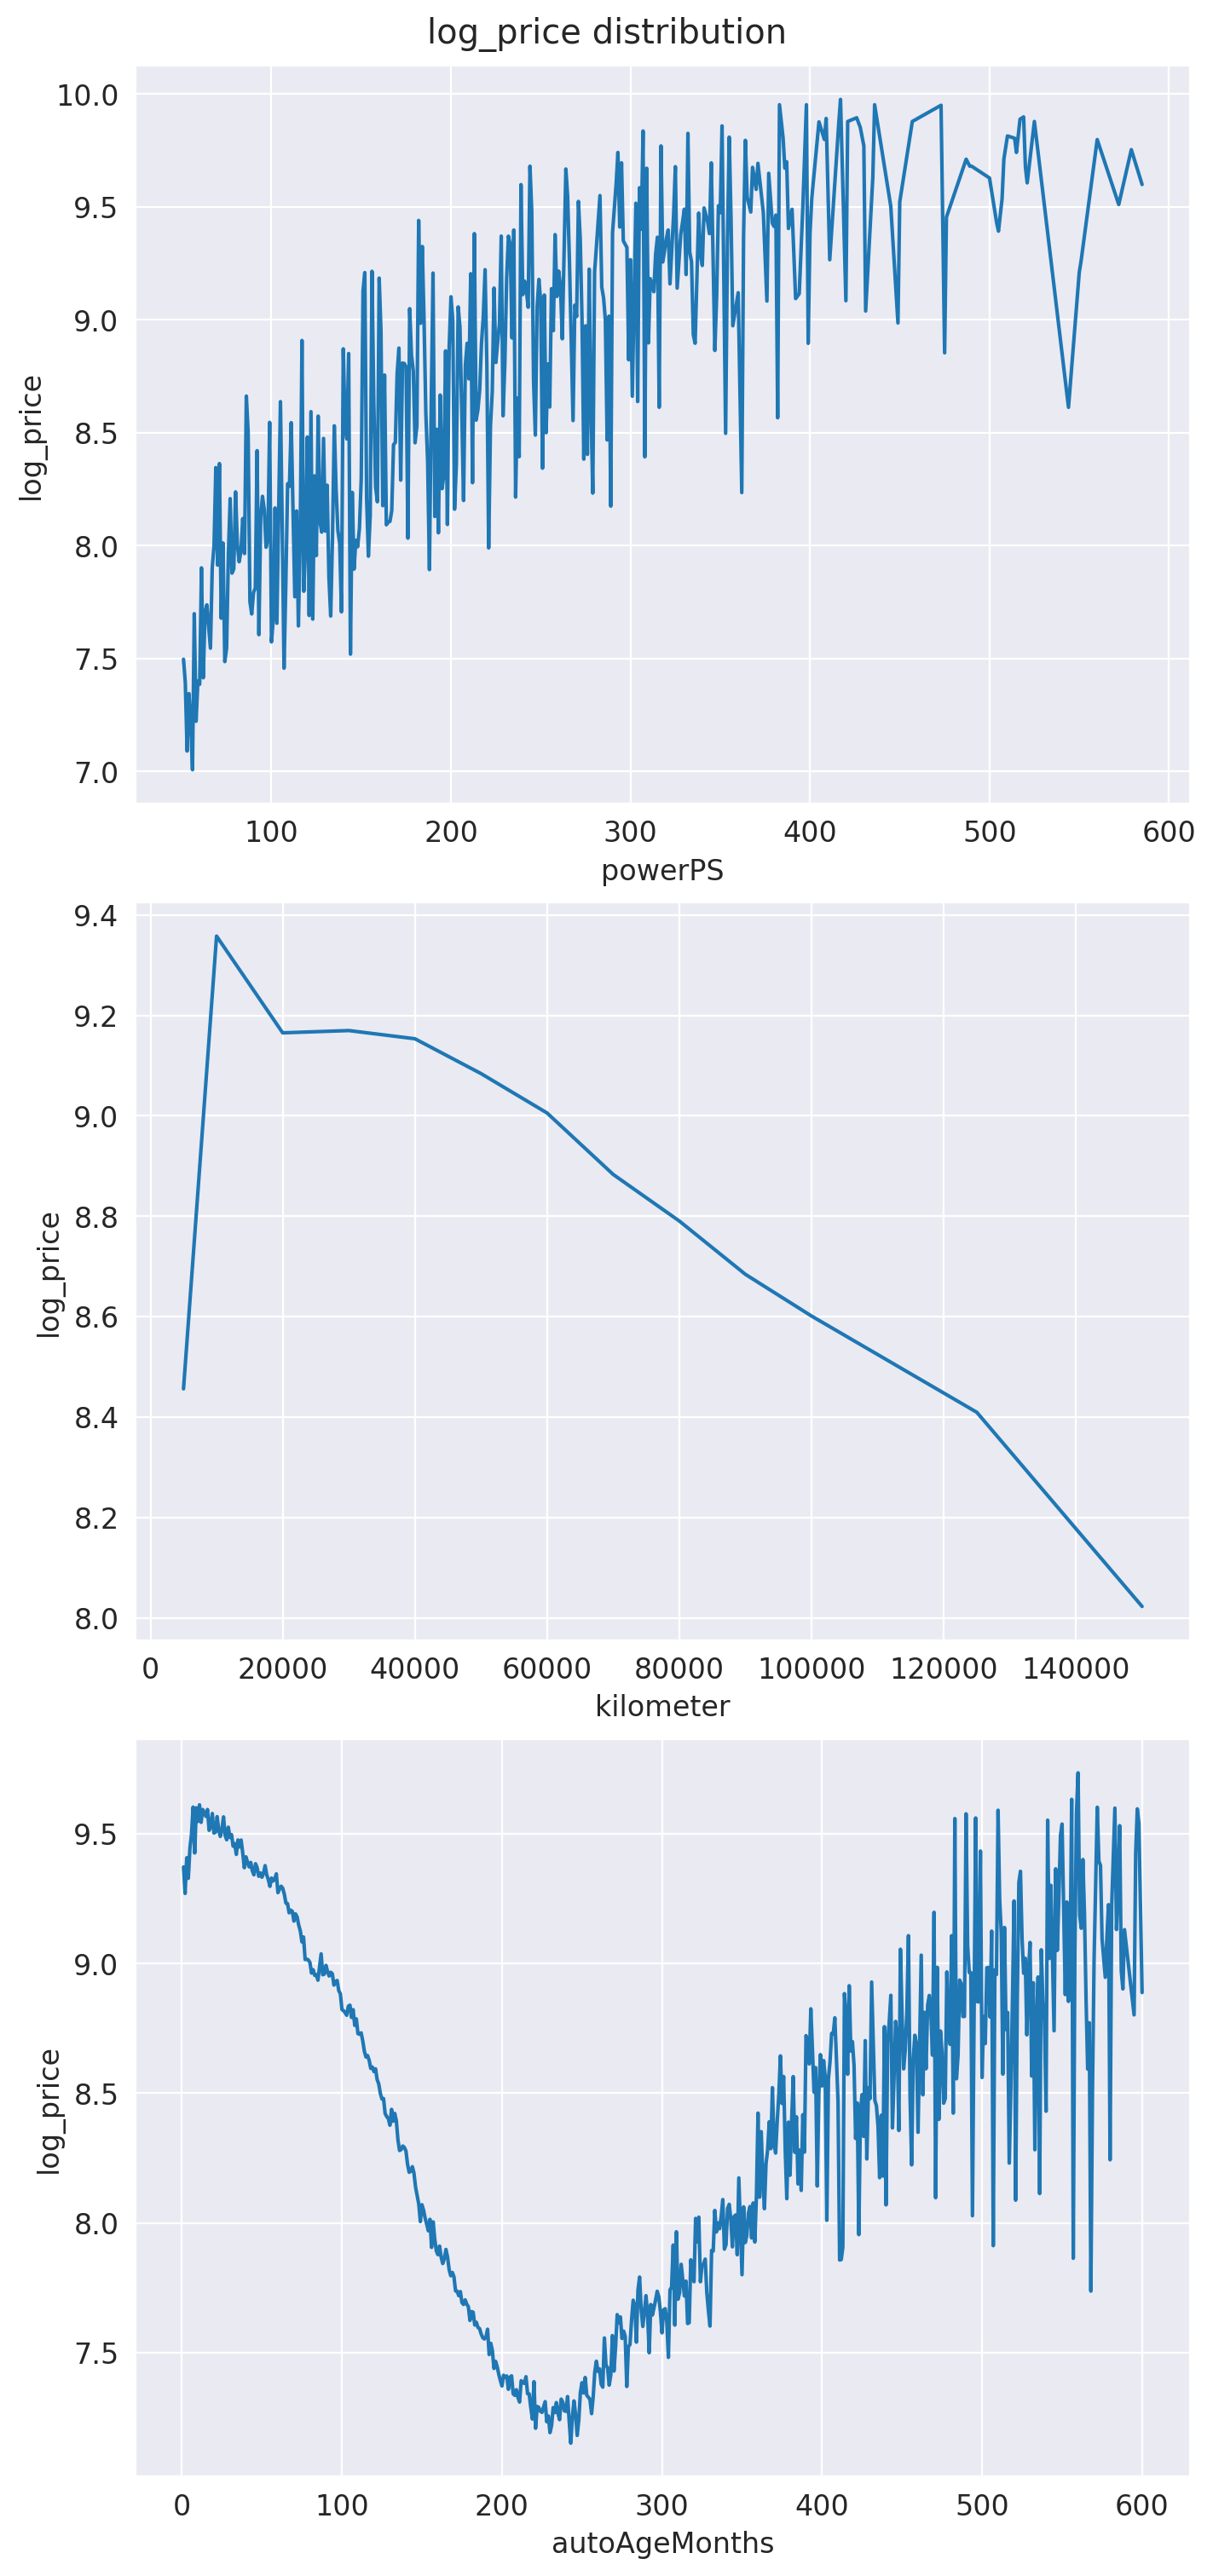

In [334]:
fig, axs = plt.subplots(figsize=(7, 15), nrows=len(numeric), constrained_layout=True)
fig.suptitle("log_price distribution")

for i, num in enumerate(numeric):
    data.groupby(num)['log_price'].mean().plot(ax=axs[i])
    axs[i].set_xlabel(num)
    axs[i].set_ylabel("log_price")

plt.show()

In [335]:
econom = ['daewoo', 'daihatsu', 'fiat', 'lancia', 'mitsubishi', 'opel', 'renault', 'rover']
middle = ['alfa_romeo',  'chevrolet', 'chrysler', 'citroen', 'dacia', 'ford', \
          'honda', 'hyundai',  'kia', 'lada', 'mazda', 'nissan', 'peugeot', 'saab', \
          'seat', 'skoda', 'smart', 'subaru', 'suzuki', 'toyota', 'volkswagen', 'volvo']
premium = ['audi', 'bmw', 'jaguar', 'jeep', 'land_rover', 'mercedes_benz', 'mini', 'porsche']

data['brand_class'] = np.nan
data.loc[data['brand'].isin(econom), 'brand_class']= 'econom'
data.loc[data['brand'].isin(middle), 'brand_class']= 'middle'
data.loc[data['brand'].isin(premium), 'brand_class']= 'premium'

In [336]:
data.drop(columns=['brand', 'model'], inplace=True)

categorical = ['brand_class', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

In [337]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [338]:
x_tmp, x_test, y_tmp, y_test = train_test_split(x, y, test_size=0.1, train_size=0.9, random_state=2)
x_train, x_val, y_train, y_val = train_test_split(x_tmp, y_tmp, test_size=1/9, train_size=8/9, random_state=2)

In [339]:
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()
data.shape, x.shape

((217527, 10), (217527, 26))

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [340]:
def reverse_prediction(predicted_values):
    return np.exp(predicted_values) - 1

lambda_range = np.logspace(-4, 0.5, 20)
optimal_lambdas = {}
gradient_descent_config = {
    'descent_name': 'placeholder for future update',
    'kwargs': {
        'dimension': x.shape[1],
    }
}

np.random.seed(2)

for method in ['full', 'stochastic', 'momentum', 'adam']:
    print(method)
    gradient_descent_config['descent_name'] = method

    descent_lambda_log = {}
    for lambda_val in lambda_range:
        gradient_descent_config['kwargs']['lambda_'] = lambda_val

        linear_model = LinearRegression(
            descent_config=gradient_descent_config
        )
        linear_model.fit(x_train, y_train)

        validation_loss = linear_model.calc_loss(x_val, y_val)
        descent_lambda_log.setdefault(method, []).append({
            'model': linear_model,
            'lambda': lambda_val,
            'val_loss': validation_loss
        })

    optimal_setting = min(descent_lambda_log[method], key=lambda entry: entry['val_loss'])
    optimal_lambdas[method] = {
        'lambda': optimal_setting['lambda'],
        'model': optimal_setting['model']
    }
    print(f'Optimal lambda = {optimal_setting["lambda"]}: val_loss = {optimal_setting["val_loss"]}')

    best_model = optimal_setting['model']

    training_loss = best_model.calc_loss(x_train, y_train)
    testing_loss = best_model.calc_loss(x_test, y_test)
    r2_score_train = r2_score(reverse_prediction(best_model.predict(x_train)), reverse_prediction(y_train))
    r2_score_test = r2_score(reverse_prediction(best_model.predict(x_test)), reverse_prediction(y_test))
    num_iterations = best_model.descent.lr.iteration
    print(f'Optimal model training loss={training_loss}, testing loss={testing_loss}, r2 training={r2_score_train}, r2 testing={r2_score_test}, iterations={num_iterations}')
    print()


full
Optimal lambda = 1.8329807108324339: val_loss = 0.2439902066194888
Optimal model training loss=0.24703016809355324, testing loss=0.25711751786262793, r2 training=0.6159367170188954, r2 testing=0.5586720744067037, iterations=106

stochastic
Optimal lambda = 0.615848211066026: val_loss = 0.2749960119214109
Optimal model training loss=0.27832342783390007, testing loss=0.29041744767222644, r2 training=0.5997163247388617, r2 testing=0.5402144761974632, iterations=142

momentum
Optimal lambda = 0.615848211066026: val_loss = 0.28266166657793224
Optimal model training loss=0.2857925192079939, testing loss=0.2989283508286568, r2 training=0.35996811120550676, r2 testing=0.3122519195918315, iterations=84

adam
Optimal lambda = 3.1622776601683795: val_loss = 0.24327745591083766
Optimal model training loss=0.24589531758007332, testing loss=0.2558155995313733, r2 training=0.6126915683921093, r2 testing=0.5552275752831328, iterations=95



### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

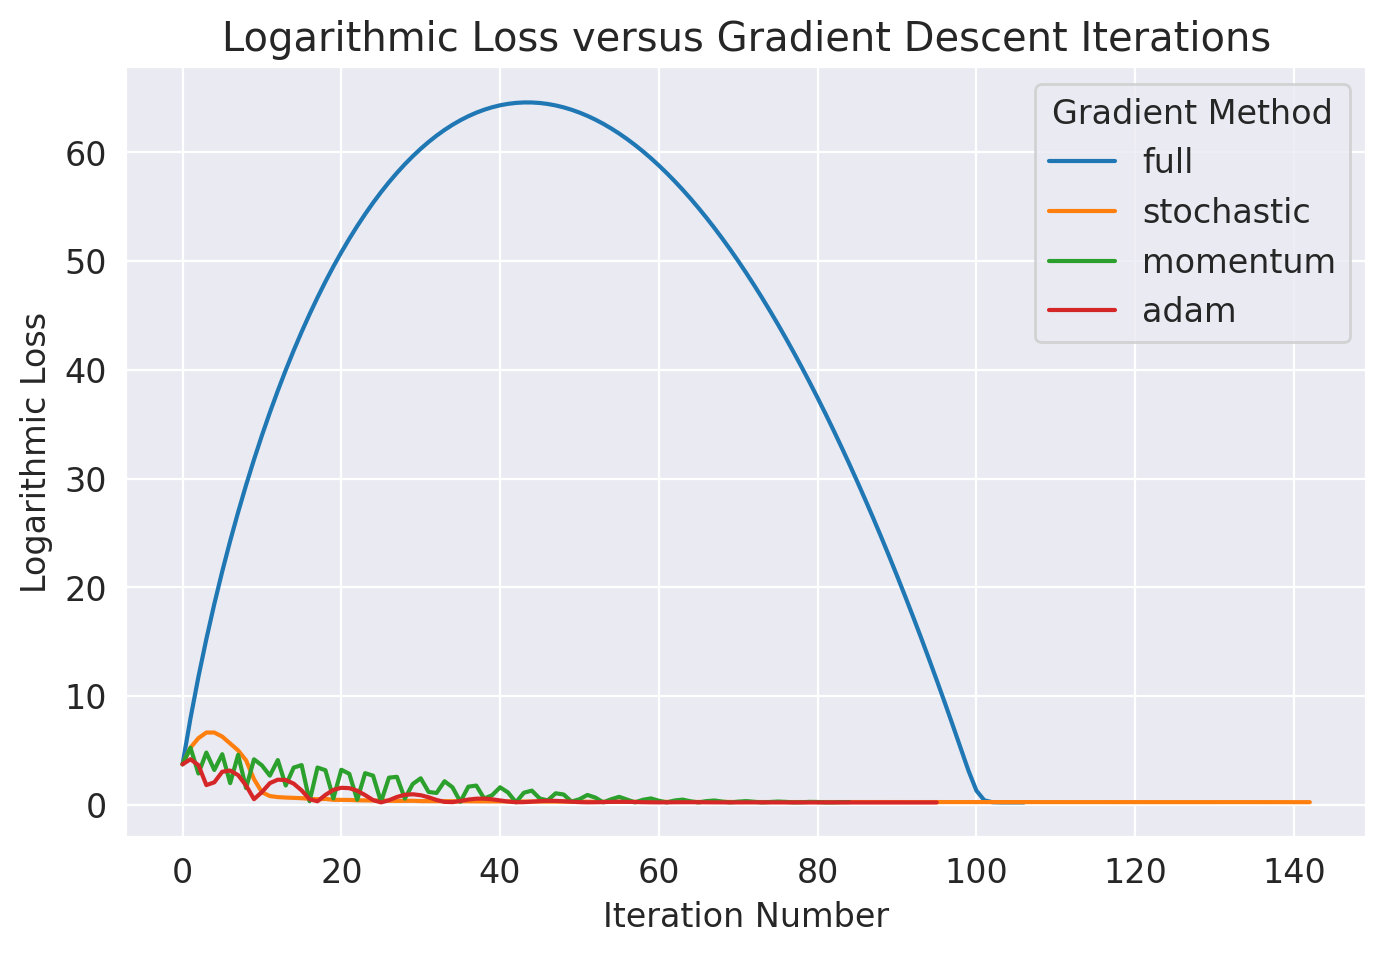

In [341]:
collected_loss_data = {
    'gradient_method': [],
    'loss_magnitude': [],
    'iteration_count': []
}

for descent_method in ['full', 'stochastic', 'momentum', 'adam']:
    chosen_model = optimal_lambdas[descent_method]['model']
    loss_history = chosen_model.loss_history
    total_iterations = chosen_model.descent.lr.iteration + 1

    collected_loss_data['gradient_method'].extend([descent_method] * total_iterations)
    collected_loss_data['loss_magnitude'].extend(loss_history)
    collected_loss_data['iteration_count'].extend(range(total_iterations))

loss_data_frame = pd.DataFrame(data=collected_loss_data)
loss_data_frame['transformed_loss'] = np.log1p(loss_data_frame['loss_magnitude'])

sns.lineplot(data=loss_data_frame, x='iteration_count', y='transformed_loss', hue='gradient_method')
plt.title("Logarithmic Loss versus Gradient Descent Iterations")
plt.xlabel("Iteration Number")
plt.ylabel("Logarithmic Loss")
plt.legend(title="Gradient Method")
plt.show()

Полный градиентный спуск изначально демонстрирует резкий пик, но затем стабилизируется, выделяясь лучшим R2 и минимумом ошибок. Точная причина такого поведения неясна, возможно, играет роль переобучение.

В случае со стохастическим спуском, после начального всплеска, его эффективность улучшается с каждой итерацией. Этот метод требует больше итераций, но работает быстрее из-за меньшего объема данных для анализа и не показывает резких скачков.

Моментум характеризуется непостоянством с заметными колебаниями в процессе обучения, и имеет самый низкий R2 среди рассмотренных методов.

Adam быстро сходится, показывая меньшие колебания и одни из лучших результатов по ошибке и R2, достигая оптимума за меньшее число итераций.

Исходя из анализа, предпочтение отдаётся полному градиентному спуску за его высокую точность или Adam за эффективность и хорошие показатели качества.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

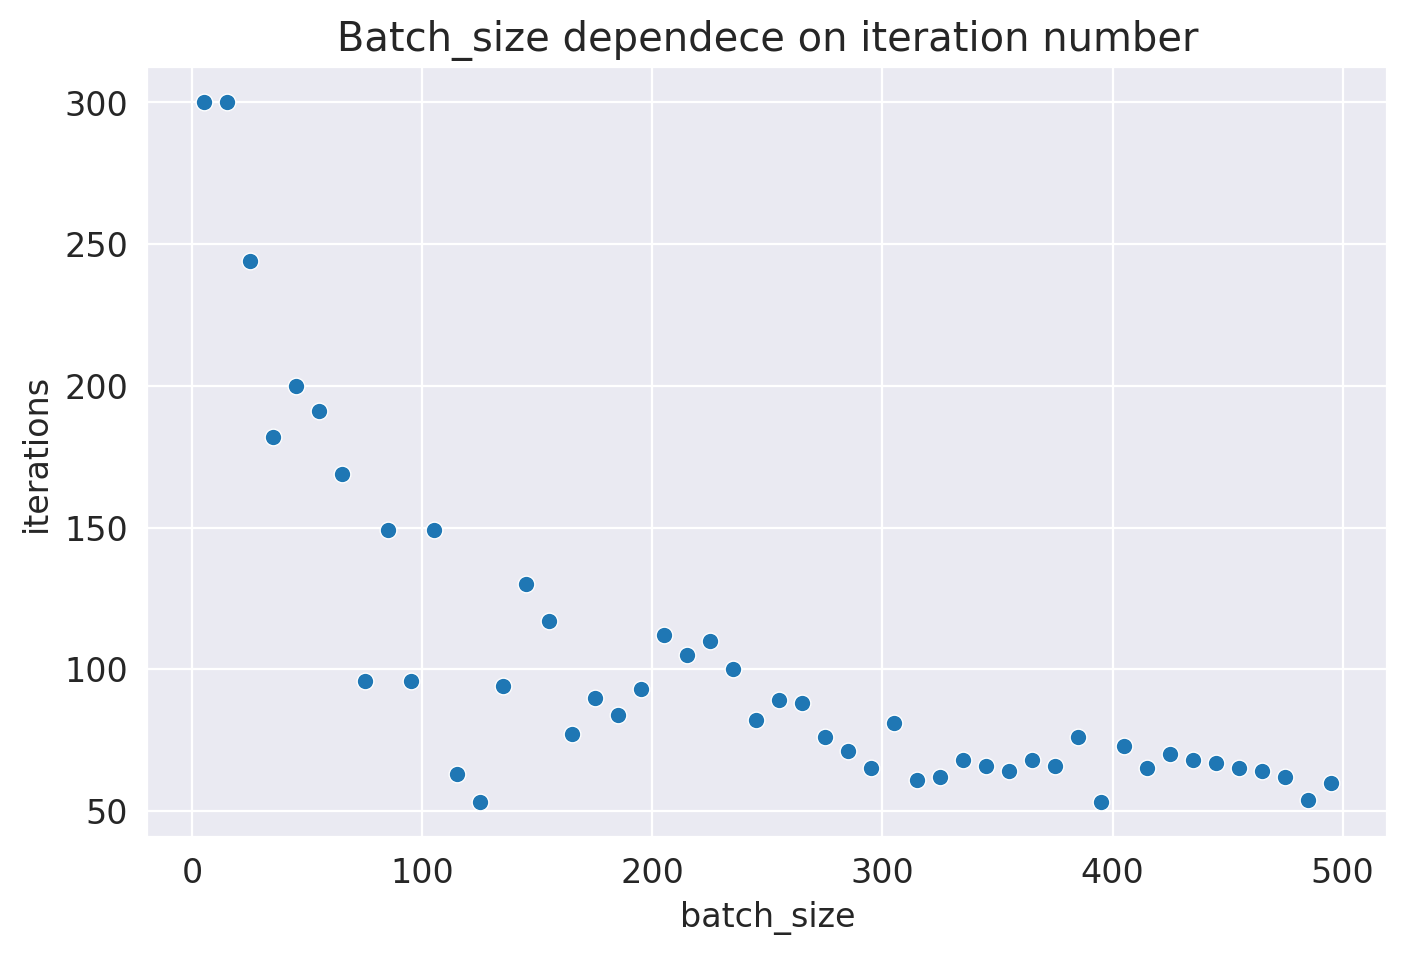

In [342]:
batch_sizes = np.arange(5, 500, 10)
k = 10

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': x.shape[1],
        'lambda_': best_lambdas['stochastic']['lambda']
    }
}

logging_batches = {}

for batch_size in batch_sizes:
    descent_config['kwargs']['batch_size'] = batch_size
    for _ in range(k):
        timestamp = time()

        regression = LinearRegression(
            descent_config=descent_config
        )
        regression.fit(x_train, y_train)

        time_diff = time() - timestamp
        logging_batches.setdefault(batch_size, {'time': [], 'iterations': []})['time'].append(time_diff)
        logging_batches[batch_size]['iterations'].append(regression.descent.lr.iteration)

d = list(map(lambda x: [x[0],
                        sum(x[1]['time']) / k,
                        round(sum(x[1]['iterations']) / k)],
             logging_batches.items()))
batch_df = pd.DataFrame(data=d, columns=['batch_size', 'time', 'iterations'])

sns.scatterplot(data=batch_df, x='batch_size', y='iterations')

plt.title('Batch_size dependece on iteration number')
plt.show()

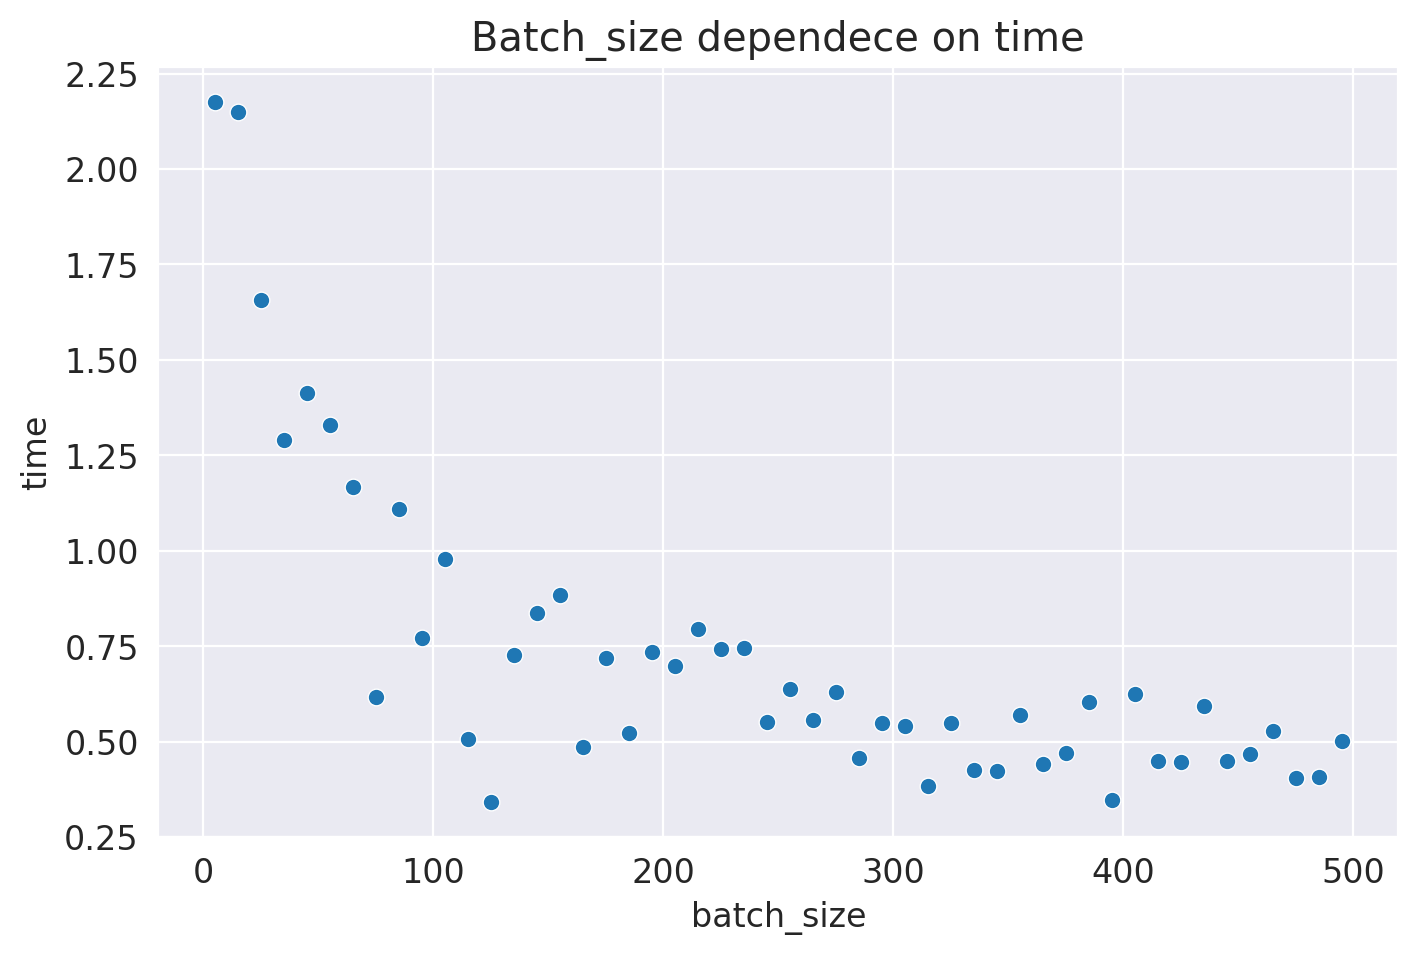

In [343]:
sns.scatterplot(data=batch_df, x='batch_size', y='time')

plt.title('Batch_size dependece on time')
plt.show()

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/108351674/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [344]:
def inverse_pred(y: np.ndarray) -> np.ndarray:
    return np.exp(y) - 1

lambdas = np.logspace(-2, 0.8, 10)
mus = np.logspace(-6, 0.5, 10)
best_parameters = {}
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'regularized': True,
    'kwargs': {
        'dimension': x.shape[1]
    }
}
np.random.seed(2)

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f'Descent_name = {descent_name}')
    descent_config['descent_name'] = descent_name

    logging_descent_lambdas = {}
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_
        for mu_ in mus:
            descent_config['kwargs']['mu'] = mu_

            regression = LinearRegression(
                descent_config=descent_config
            )
            regression.fit(x_train, y_train)

            val_loss = regression.calc_loss(x_val, y_val)
            logging_descent_lambdas.setdefault(descent_name, []).append(
                {
                    'model': regression,
                    'mu': mu_,
                    'lambda': lambda_,
                    'val_loss': val_loss
                }
            )
    best = min(logging_descent_lambdas[descent_name], key=lambda x: x['val_loss'])
    best_parameters[descent_name] = {
        'lambda': best['lambda'],
        'mu': best['mu'],
        'model': best['model']
    }
    print(f'Best lambda = {best["lambda"]} & Best mu = {best["mu"]}: val_loss = {best["val_loss"]}')

    model = best['model']

    train_loss = model.calc_loss(x_train, y_train)
    test_loss = model.calc_loss(x_test, y_test)
    r2_train = r2_score(inverse_pred(model.predict(x_train)), inverse_pred(y_train))
    r2_test = r2_score(inverse_pred(model.predict(x_test)), inverse_pred(y_test))
    iter_num = model.descent.lr.iteration
    print(f'Best model \n train_loss={train_loss}, test_loss={test_loss}, \n '
          f'r2_train={r2_train}, r2_test={r2_test}, iterations={iter_num}')
    print()

Descent_name = full
Best lambda = 1.5058363542798414 & Best mu = 1e-06: val_loss = 0.259431852220283
Best model 
 train_loss=0.263082993155855, test_loss=0.27152288775743044, 
 r2_train=0.6030229613923226, r2_test=0.5489327127271852, iterations=42

Descent_name = stochastic
Best lambda = 0.7356422544596414 & Best mu = 1e-06: val_loss = 0.26539262207084025
Best model 
 train_loss=0.2696991107068375, test_loss=0.27706260998426335, 
 r2_train=0.5710174083564876, r2_test=0.5284820667779957, iterations=180

Descent_name = momentum
Best lambda = 0.7356422544596414 & Best mu = 0.004084238652674522: val_loss = 0.24505979726104096
Best model 
 train_loss=0.2479983946053181, test_loss=0.257655282083356, 
 r2_train=0.6133211449827758, r2_test=0.5584508932809558, iterations=214

Descent_name = adam
Best lambda = 6.309573444801933 & Best mu = 5.274997063702619e-06: val_loss = 0.24647513479067293
Best model 
 train_loss=0.24850473547652213, test_loss=0.2585529071779104, 
 r2_train=0.6187347816684661

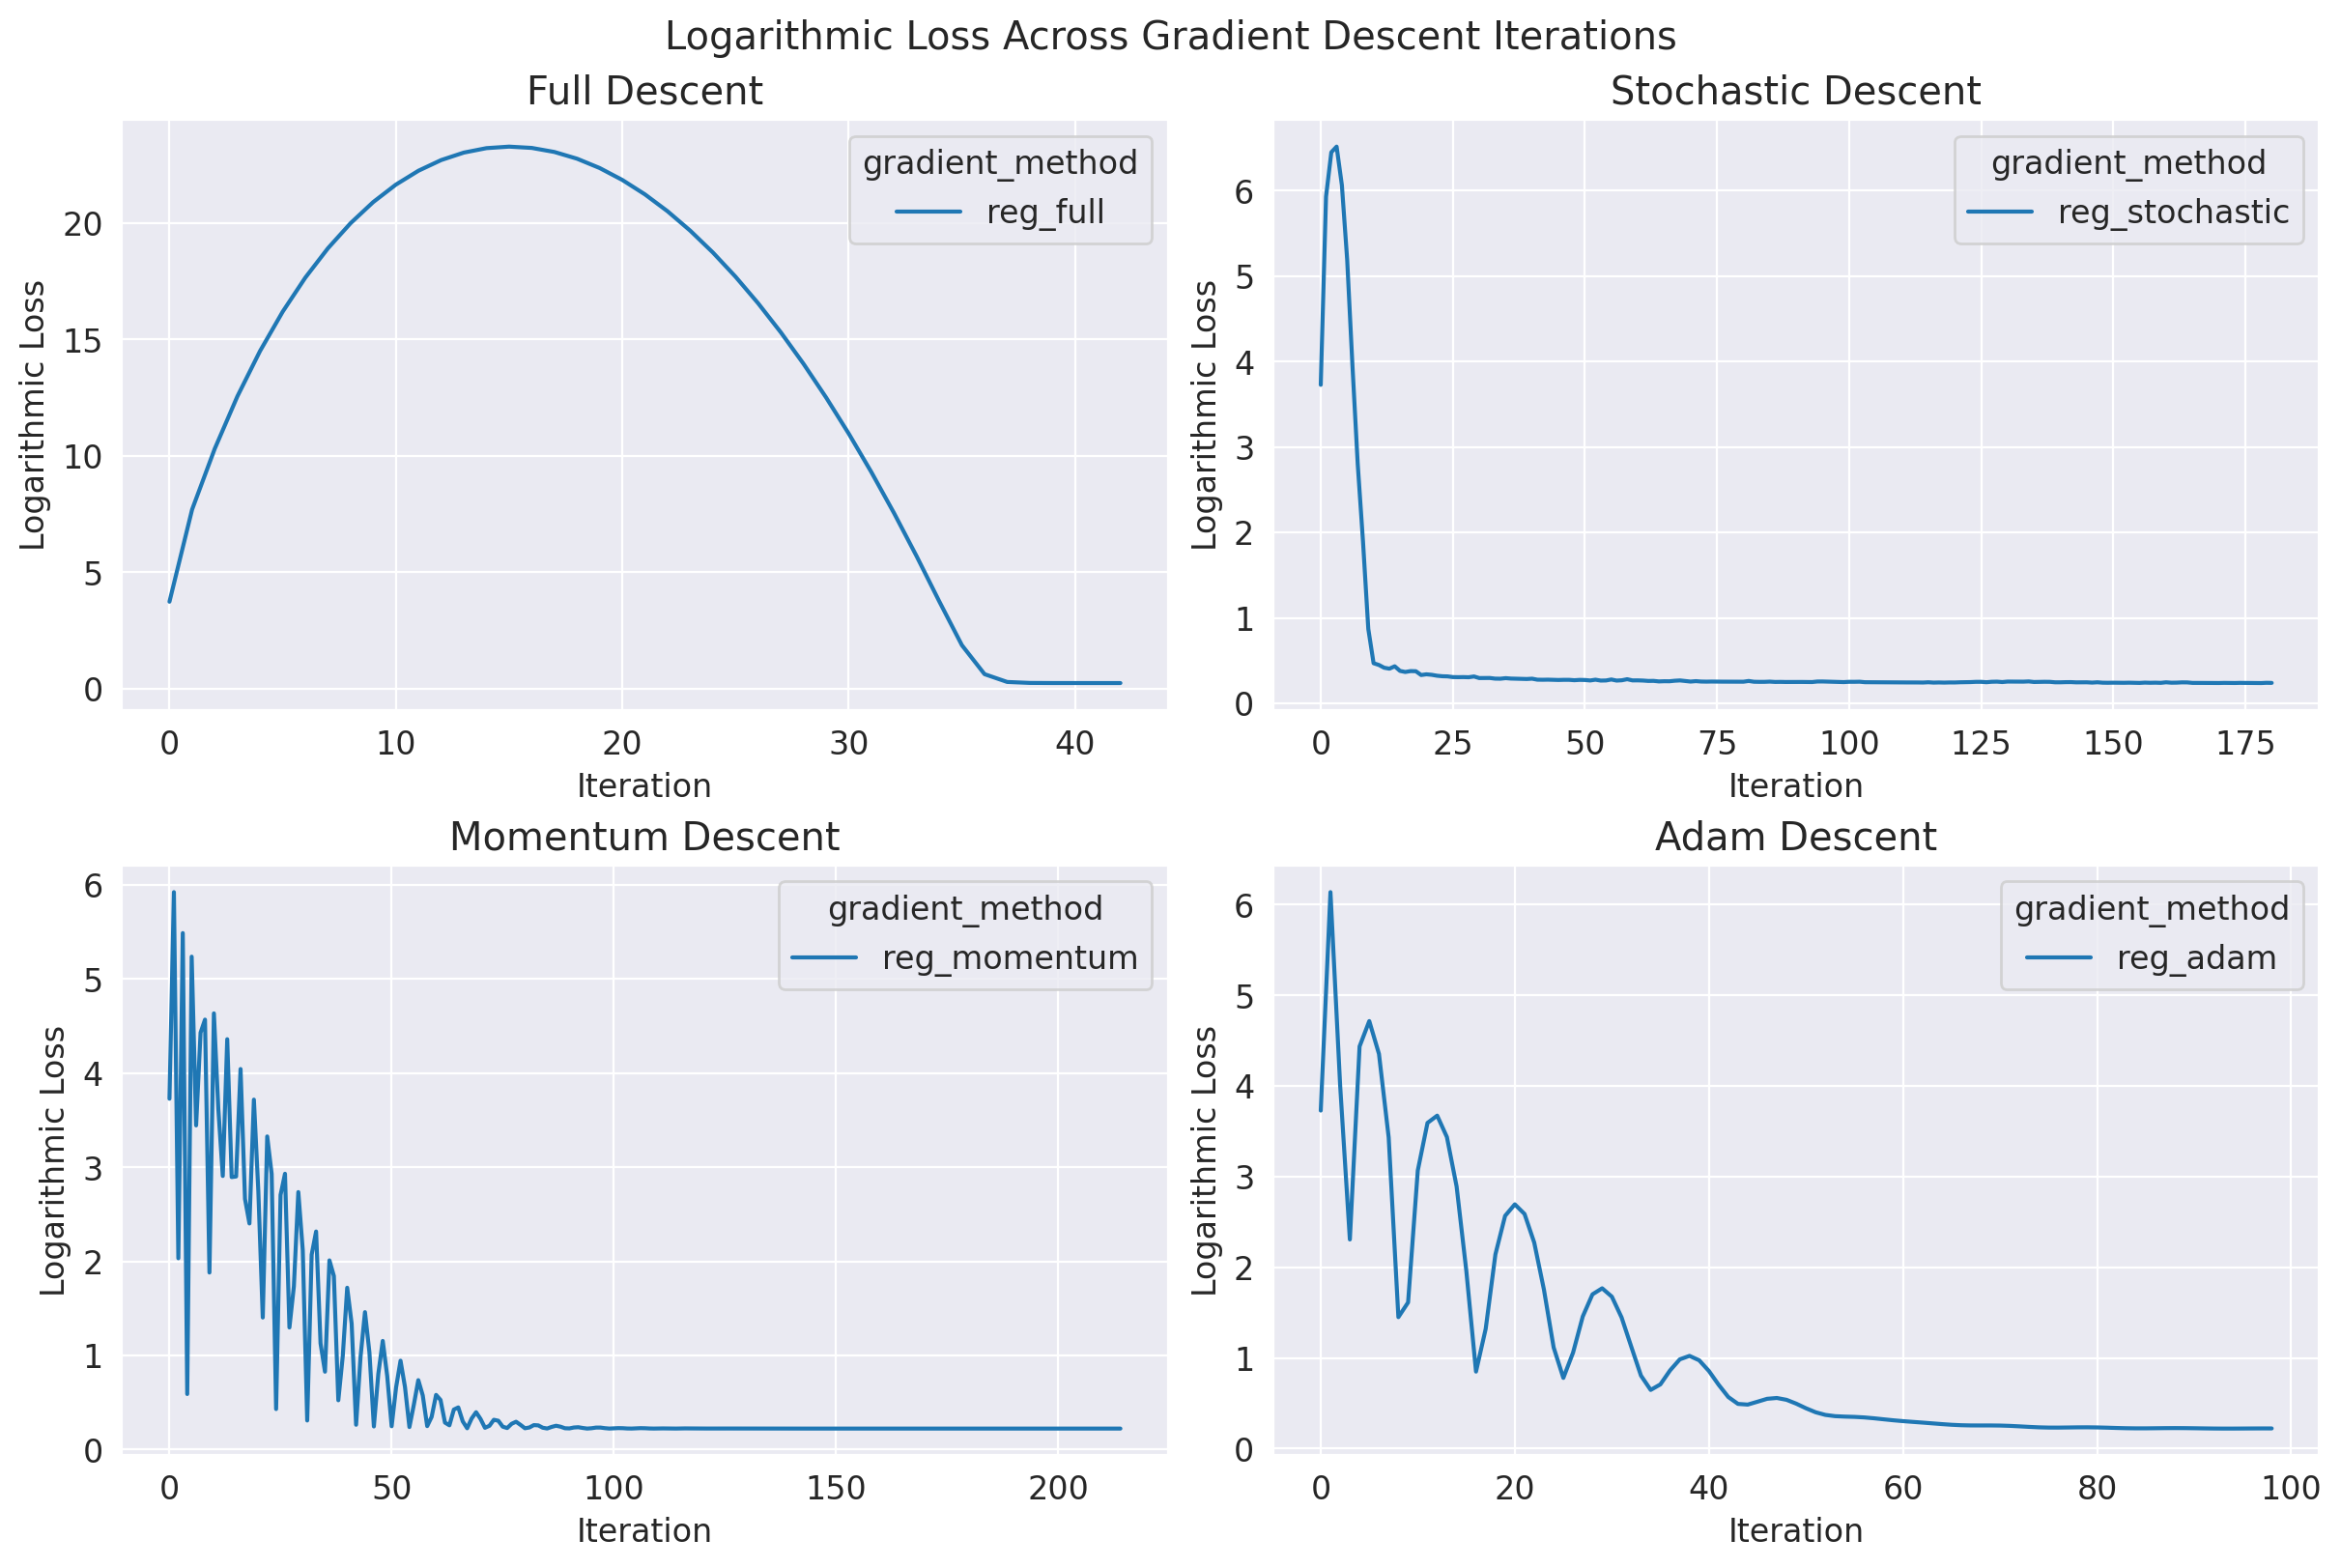

In [345]:
regression_data = {
    'gradient_method': [],
    'loss_value': [],
    'iteration_step': []
}

for method in ['full', 'stochastic', 'momentum', 'adam']:
    current_model = best_parameters[method]['model']
    loss_trajectory = current_model.loss_history
    total_iterations = current_model.descent.lr.iteration + 1

    method_label = 'reg_' + method
    regression_data['gradient_method'].extend([method_label] * total_iterations)
    regression_data['loss_value'].extend(loss_trajectory)
    regression_data['iteration_step'].extend(range(total_iterations))

regression_dataframe = pd.DataFrame(data=regression_data)
regression_dataframe['logarithmic_loss'] = np.log1p(regression_dataframe['loss_value'])

combined_dataframe = pd.concat([regression_dataframe, plot_loss_df])

fig, axes = plt.subplots(figsize=(12, 8), ncols=2, nrows=2, constrained_layout=True)
fig.suptitle("Logarithmic Loss Across Gradient Descent Iterations")

position_mapping = {
    'full': (0, 0),
    'stochastic': (0, 1),
    'momentum': (1, 0),
    'adam': (1, 1)
}

for i, (method, position) in enumerate(position_mapping.items()):
    ax = axes[position]
    filtered_data = combined_dataframe[combined_dataframe['gradient_method'].isin([method, 'reg_' + method])]
    sns.lineplot(data=filtered_data, x='iteration_step', y='logarithmic_loss', hue='gradient_method', ax=ax)
    ax.set_title(f'{method.capitalize()} Descent')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Logarithmic Loss')

plt.show()


## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
    \dfrac{dL(y, a)} {dw}
    =
    (\log\left(\cosh(a - y)\right))' dw = \dfrac{1} {\cosh(Xw - y)} sech(Xw - y) X dw = tanh(Xw - y) X dw = (X^T tanh(Xw - y))^T dw
$$

$$
    \nabla Q(w) = X^T tanh(Xw - y)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [346]:
lambdas = np.logspace(-4, 0.5, 20)
best_log_loss = {}
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': x.shape[1],
        'loss_function': LossFunction.LogCosh
    }
}
np.random.seed(2)

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f'Descent_name = {descent_name}')
    descent_config['descent_name'] = descent_name

    logging_descent_lambdas = {}
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_

        regression = LinearRegression(
            descent_config=descent_config
        )
        regression.fit(x_train, y_train)

        val_loss = regression.calc_loss(x_val, y_val)
        logging_descent_lambdas.setdefault(descent_name, []).append(
            {
                'model': regression,
                'lambda': lambda_,
                'val_loss': val_loss
            }
        )
    best = min(logging_descent_lambdas[descent_name], key=lambda x: x['val_loss'])
    best_log_loss[descent_name] = {
        'lambda': best['lambda'],
        'model': best['model']
    }
    print(f'Best lambda = {best["lambda"]}: val_loss = {best["val_loss"]}')

    model = best['model']

    train_loss = model.calc_loss(x_train, y_train)
    test_loss = model.calc_loss(x_test, y_test)
    r2_train = r2_score(inverse_pred(model.predict(x_train)), inverse_pred(y_train))
    r2_test = r2_score(inverse_pred(model.predict(x_test)), inverse_pred(y_test))
    iter_num = model.descent.lr.iteration
    print(f'Best model \n train_loss={train_loss}, test_loss={test_loss}, \n '
          f'r2_train={r2_train}, r2_test={r2_test}, iterations={iter_num}')
    print()

Descent_name = full
Best lambda = 1.8329807108324339: val_loss = 0.2439902066194888
Best model 
 train_loss=0.24703016809355324, test_loss=0.25711751786262793, 
 r2_train=0.6159367170188954, r2_test=0.5586720744067037, iterations=106

Descent_name = stochastic
Best lambda = 0.615848211066026: val_loss = 0.2749960119214109
Best model 
 train_loss=0.27832342783390007, test_loss=0.29041744767222644, 
 r2_train=0.5997163247388617, r2_test=0.5402144761974632, iterations=142

Descent_name = momentum
Best lambda = 0.615848211066026: val_loss = 0.28266166657793224
Best model 
 train_loss=0.2857925192079939, test_loss=0.2989283508286568, 
 r2_train=0.35996811120550676, r2_test=0.3122519195918315, iterations=84

Descent_name = adam
Best lambda = 3.1622776601683795: val_loss = 0.24327745591083766
Best model 
 train_loss=0.24589531758007332, test_loss=0.2558155995313733, 
 r2_train=0.6126915683921093, r2_test=0.5552275752831328, iterations=95



### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [347]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [348]:
# YOUR CODE: